In [1]:
# Figure showing flower counting linear evaluation performance.
import pandas as pd

linear_eval_data = pd.read_excel("Linear Evaluation Results.xlsx", sheet_name="# Flowers")
linear_eval_data

,Pre-Train,Multi View?,# Views,Train Set,Test Set,MAE,SMAPE
0,COCo,N,NaN,ssl_active_3,ssl_active_2,0.87,128
1,Random,N,NaN,ssl_active_3,ssl_active_2,0.82,123
2,SimCLR,Y,4.0,ssl_active_3,ssl_active_2,0.88,130
3,COCo,N,NaN,active_1,2018-08-22 00:00:00,1.73,99
4,Random,N,NaN,active_1,2018-08-22 00:00:00,1.76,91
5,SimCLR,Y,4.0,active_1,2018-08-22 00:00:00,1.71,111
6,SimCLR,Y,2.0,active_1,2018-08-22 00:00:00,1.62,92
7,SimCLR,Y,2.0,ssl_active_3,ssl_active_2,0.72,130
8,SimCLR,N,NaN,active_1,2018-08-22 00:00:00,1.70,109
9,SimCLR,N,NaN,ssl_active_3,ssl_active_2,0.84,138


In [2]:
is_ground = linear_eval_data["Train Set"] == "ssl_active_3"
linear_eval_data["Platform"] = ["ground" if g else "aerial" for g in is_ground]

In [3]:
import numpy as np

def _create_model_name(row: pd.Series) -> str:
    if row["Pre-Train"] != "SimCLR":
        return row["Pre-Train"]
    if row["Multi View?"] == "N":
        return "Vanilla SimCLR"
    return f"{int(row['# Views'])}-View SimCLR"

linear_eval_data["Name"] = linear_eval_data.apply(_create_model_name, axis=1)
# Remove multi-view MoCo, as this experiment never worked well. We'll just add a note that it didn't work instead of including it
# and wrecking the scale of all the graphs.
linear_eval_data = linear_eval_data[np.logical_or(linear_eval_data["Pre-Train"] != "MoCo", linear_eval_data["Multi View?"] != "Y")]

In [4]:
linear_eval_data

,Pre-Train,Multi View?,# Views,Train Set,Test Set,MAE,SMAPE,Platform,Name
0,COCo,N,NaN,ssl_active_3,ssl_active_2,0.87,128,ground,COCo
1,Random,N,NaN,ssl_active_3,ssl_active_2,0.82,123,ground,Random
2,SimCLR,Y,4.0,ssl_active_3,ssl_active_2,0.88,130,ground,4-View SimCLR
3,COCo,N,NaN,active_1,2018-08-22 00:00:00,1.73,99,aerial,COCo
4,Random,N,NaN,active_1,2018-08-22 00:00:00,1.76,91,aerial,Random
5,SimCLR,Y,4.0,active_1,2018-08-22 00:00:00,1.71,111,aerial,4-View SimCLR
6,SimCLR,Y,2.0,active_1,2018-08-22 00:00:00,1.62,92,aerial,2-View SimCLR
7,SimCLR,Y,2.0,ssl_active_3,ssl_active_2,0.72,130,ground,2-View SimCLR
8,SimCLR,N,NaN,active_1,2018-08-22 00:00:00,1.70,109,aerial,Vanilla SimCLR
9,SimCLR,N,NaN,ssl_active_3,ssl_active_2,0.84,138,ground,Vanilla SimCLR


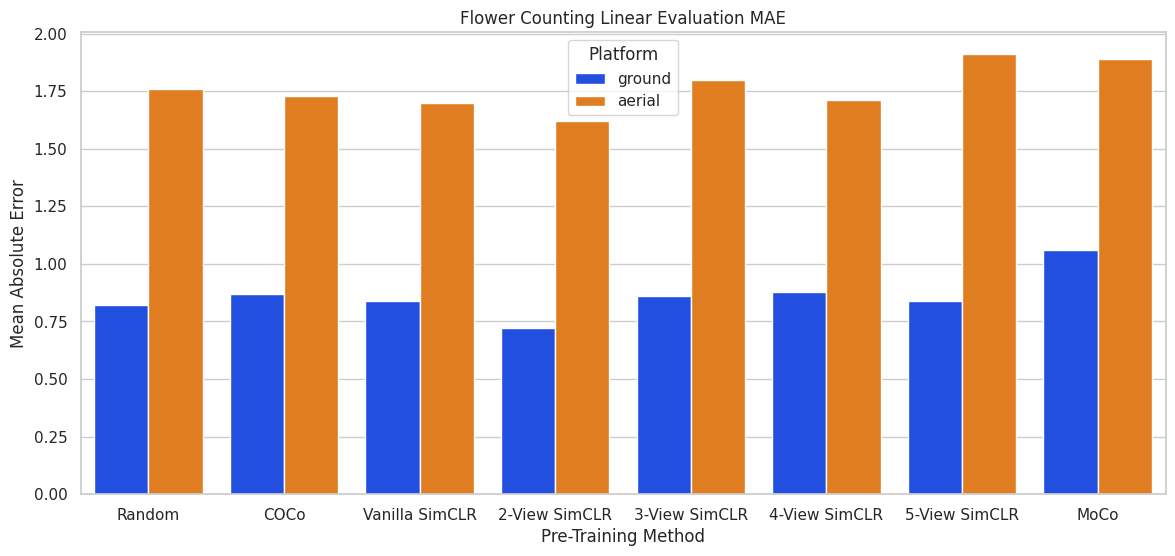

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set seaborn style
sns.set(style="whitegrid")

# Create the bar plot
plt.figure(figsize=(14, 6))
x_ordered = ["Random", "COCo", "Vanilla SimCLR", "2-View SimCLR", "3-View SimCLR", "4-View SimCLR", "5-View SimCLR", "MoCo"]
sns.barplot(data=linear_eval_data, x="Name", y='MAE', hue='Platform', palette='bright', order=x_ordered)
plt.title('Flower Counting Linear Evaluation MAE')
plt.xlabel('Pre-Training Method')
plt.ylabel('Mean Absolute Error')
plt.legend(title='Platform')

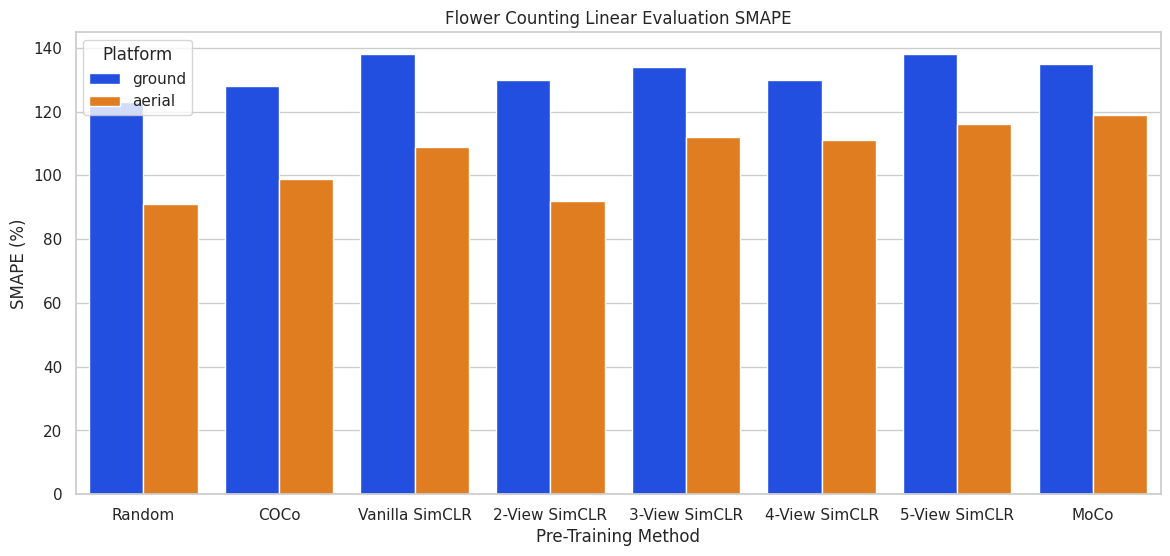

In [6]:
# Create the bar plot
plt.figure(figsize=(14, 6))
sns.barplot(data=linear_eval_data, x='Name', y='SMAPE', hue='Platform', palette='bright', order=x_ordered)
plt.title('Flower Counting Linear Evaluation SMAPE')
plt.xlabel('Pre-Training Method')
plt.ylabel('SMAPE (%)')
plt.legend(title='Platform')

In [7]:
# Create the figure showing plot status linear eval data.
plot_status_data = pd.read_excel("Linear Evaluation Results.xlsx", sheet_name="Plot Status")
plot_status_data

,Pre-Train,Multi View?,# Views,Test Acc.
0,SimCLR,Y,4.0,0.85
1,COCo,N,NaN,0.70
2,Random,N,NaN,0.45
3,SimCLR,Y,2.0,0.85
4,SimCLR,N,NaN,0.85
5,SimCLR,Y,3.0,0.90
6,SimCLR,Y,5.0,0.80
7,MoCo,N,NaN,0.85
8,MoCo,Y,2.0,0.50


In [8]:
plot_status_data["Name"] = plot_status_data.apply(_create_model_name, axis=1)
# Remove multi-view MoCo, as this experiment never worked well. We'll just add a note that it didn't work instead of including it
# and wrecking the scale of all the graphs.
plot_status_data = plot_status_data[np.logical_or(plot_status_data["Pre-Train"] != "MoCo", plot_status_data["Multi View?"] != "Y")]
plot_status_data

,Pre-Train,Multi View?,# Views,Test Acc.,Name
0,SimCLR,Y,4.0,0.85,4-View SimCLR
1,COCo,N,NaN,0.70,COCo
2,Random,N,NaN,0.45,Random
3,SimCLR,Y,2.0,0.85,2-View SimCLR
4,SimCLR,N,NaN,0.85,Vanilla SimCLR
5,SimCLR,Y,3.0,0.90,3-View SimCLR
6,SimCLR,Y,5.0,0.80,5-View SimCLR
7,MoCo,N,NaN,0.85,MoCo


Text(0, 0.5, 'Accuracy (%)')

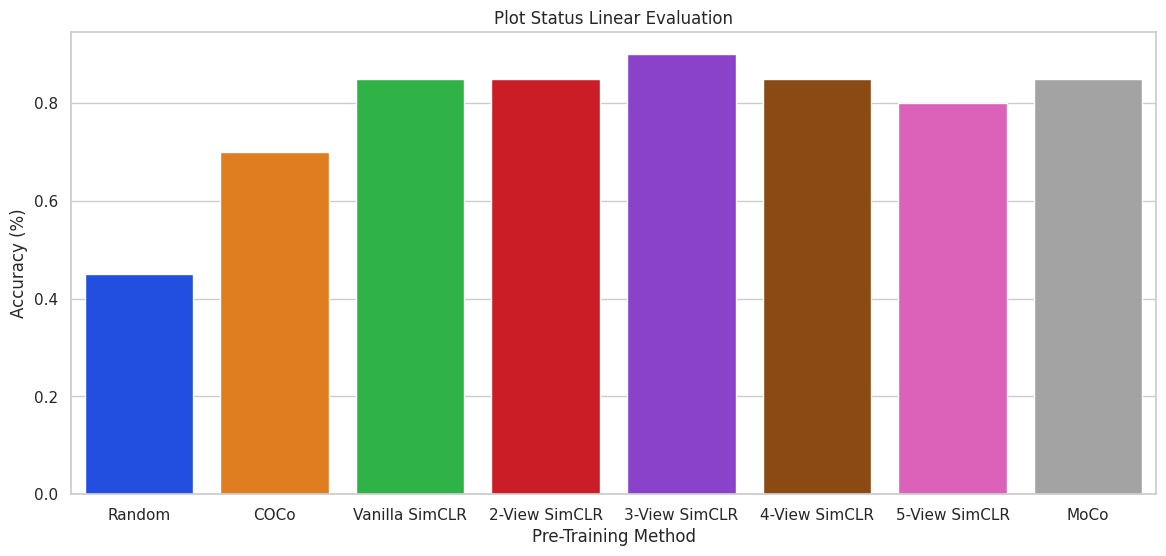

In [9]:
# Create the bar plot
plt.figure(figsize=(14, 6))
sns.barplot(data=plot_status_data, x='Name', y='Test Acc.', palette='bright', order=x_ordered)
plt.title('Plot Status Linear Evaluation')
plt.xlabel('Pre-Training Method')
plt.ylabel('Accuracy (%)')

In [10]:
import pandas as pd

# Create semi-supervised training figures.
random_maps_0_5 = [0] * 3
coco_maps_0_5 = [0.6465926427918839, 0.5964542796146257, 0.5348510143574495]
vanilla_maps_0_5 = [0.2284062132143119, 0.20472973109870907, 0.14347617950903893]
view_2_maps_0_5 = [0.31594438633426136, 0.2954195463093703, 0.2878499402157016, 0.2505886499629378, 0.24949244140143031]
view_3_maps_0_5 = [0.34777463076514487, 0.32744410098175336, 0.2673829176991453]
view_4_maps_0_5 = [0.2950983352339338, 0.25059299575948757, 0.24060250208833342]
view_5_maps_0_5 = [0.2863129814883511, 0.28141680364570987, 0.2620731982360415]
moco_maps_0_5 = [0.47113, 0.46866, 0.40942]

maps_0_5 = random_maps_0_5 + coco_maps_0_5 + vanilla_maps_0_5 + view_2_maps_0_5 + view_3_maps_0_5 + view_4_maps_0_5 + view_5_maps_0_5 + moco_maps_0_5

In [11]:
# Create semi-supervised training figures.
random_maps_0_95 = [0] * 3
coco_maps_0_95 = [0.49472, 0.40513, 0.36209]
vanilla_maps_0_95 = [0.09485411212487153, 0.08320092706078355, 0.06684267473591418]
view_2_maps_0_95 = [0.1759376219836175, 0.1590482638862619, 0.14854982476430942, 0.1332085006807918, 0.12187633752774367]
view_3_maps_0_95 = [0.18926761418681476, 0.1829721031773426, 0.1533082440819751]
view_4_maps_0_95 = [0.13949452988973715, 0.13519973357744478, 0.12520435978734118]
view_5_maps_0_95 = [0.15373847947900038, 0.14366768602726393, 0.12462590667046577]
moco_maps_0_95 = [0.22164, 0.22175, 0.19265204015721066]

maps_0_95 = random_maps_0_95 + coco_maps_0_95 + vanilla_maps_0_95 + view_2_maps_0_95 + view_3_maps_0_95 + view_4_maps_0_95 + view_5_maps_0_95 + moco_maps_0_95
names = ["Random"] * len(random_maps_0_5) + ["COCo"] * len(coco_maps_0_5) + ["Vanilla SimCLR"] * len(vanilla_maps_0_5) + \
    ["2-View SimCLR"] * len(view_2_maps_0_5) + ["3-View SimCLR"] * len(view_3_maps_0_5) + ["4-View SimCLR"] * len(view_4_maps_0_5) + ["5-View SimCLR"] * len(view_5_maps_0_5) + \
    ["MoCo"] * len(moco_maps_0_5)
map_types = ["mAP@0.5"] * len(maps_0_5) + ["mAP@0.5:0.95"] * len(maps_0_95)
semi_supervised_results = pd.DataFrame(data={"Name": names * 2, "mAP": maps_0_5 + maps_0_95, "Metric": map_types})
semi_supervised_results

,Name,mAP,Metric
0,Random,0.000000,mAP@0.5
1,Random,0.000000,mAP@0.5
2,Random,0.000000,mAP@0.5
3,COCo,0.646593,mAP@0.5
4,COCo,0.596454,mAP@0.5
5,COCo,0.534851,mAP@0.5
6,Vanilla SimCLR,0.228406,mAP@0.5
7,Vanilla SimCLR,0.204730,mAP@0.5
8,Vanilla SimCLR,0.143476,mAP@0.5
9,2-View SimCLR,0.315944,mAP@0.5


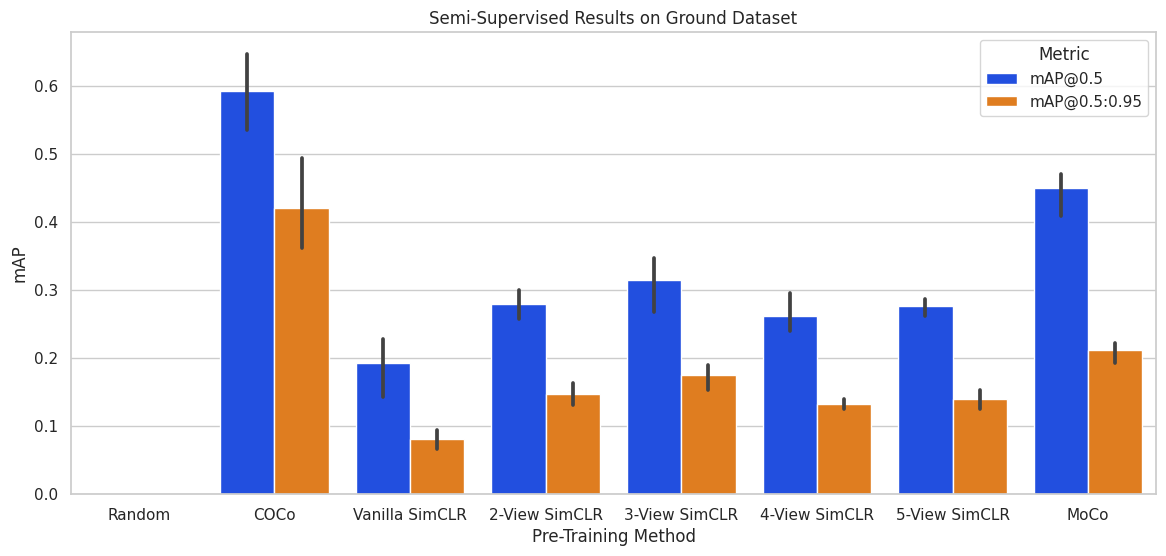

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set seaborn style
sns.set(style="whitegrid")

# Create the bar plot with 95% confidence interval error bars
plt.figure(figsize=(14, 6))
sns.barplot(data=semi_supervised_results, x='Name', y='mAP', ci=95, palette='bright', order=x_ordered, hue="Metric")
plt.title('Semi-Supervised Results on Ground Dataset')
plt.xlabel('Pre-Training Method')
plt.ylabel('mAP')
plt.show()

In [13]:
coco_maps_0_5 = [0.7437818640433991, 0.7194810230562404, 0.7139373964685265]
coco_maps_0_95 = [0.4607844675488253, 0.43023009195712564, 0.4256619813071034]
random_maps_0_5 = [0.38956318240481685, 0.3739270335686412, 0.3578194321415771]
random_maps_0_95 = [0.1708983883811221, 0.1589901798711411, 0.1524602821625644]
vanilla_maps_0_5 = [0.2826877750022493, 0.2777211750255481, 0.23467493994442373]
vanilla_maps_0_95 = [0.135833563595355, 0.1293347390348739, 0.11160042073468461]
view_2_maps_0_5 = [0.5291899722266377, 0.5041690687546687, 0.5006493859002993]
view_2_maps_0_95 = [0.26236330734223623, 0.23124962580872593, 0.2308503457260071]
view_3_maps_0_5 = [0.5711926982624815, 0.5697556225993778, 0.5394528002549515]
view_3_maps_0_95 = [0.2829768820403252, 0.2740352111409542, 0.26691105648634744]
view_4_maps_0_5 = [0.605338346630161, 0.57201994296665, 0.5418738899148547]
view_4_maps_0_95 = [0.28067222810013204, 0.2677340125297493, 0.25759428351035474]
view_5_maps_0_5 = [0.6016858724475019, 0.5771312309830503, 0.5658790105491486]
view_5_maps_0_95 = [0.30039435853460655, 0.272764076390188, 0.2638459102305321]
moco_maps_0_5 = [0.6105313066534491, 0.6049253004764937, 0.5843417618246421]
moco_maps_0_95 = [0.28797, 0.2954335351145108, 0.28365972113733845]

maps_0_5 = random_maps_0_5 + coco_maps_0_5 + vanilla_maps_0_5 + view_2_maps_0_5 + view_3_maps_0_5 + view_4_maps_0_5 + view_5_maps_0_5 + moco_maps_0_5
maps_0_95 = random_maps_0_95 + coco_maps_0_95 + vanilla_maps_0_95 + view_2_maps_0_95 + view_3_maps_0_95 + view_4_maps_0_95 + view_5_maps_0_95 + moco_maps_0_95
map_types = ["mAP@0.5"] * len(maps_0_5) + ["mAP@0.5:0.95"] * len(maps_0_95)
names = ["Random"] * len(random_maps_0_5) + ["COCo"] * len(coco_maps_0_5) + ["Vanilla SimCLR"] * len(vanilla_maps_0_5) + \
    ["2-View SimCLR"] * len(view_2_maps_0_5) + ["3-View SimCLR"] * len(view_3_maps_0_5) + ["4-View SimCLR"] * len(view_4_maps_0_5) + ["5-View SimCLR"] * len(view_5_maps_0_5) + \
    ["MoCo"] * len(moco_maps_0_5)
semi_supervised_results = pd.DataFrame(data={"Name": names * 2, "mAP": maps_0_5 + maps_0_95, "Metric": map_types})
semi_supervised_results

,Name,mAP,Metric
0,Random,0.389563,mAP@0.5
1,Random,0.373927,mAP@0.5
2,Random,0.357819,mAP@0.5
3,COCo,0.743782,mAP@0.5
4,COCo,0.719481,mAP@0.5
5,COCo,0.713937,mAP@0.5
6,Vanilla SimCLR,0.282688,mAP@0.5
7,Vanilla SimCLR,0.277721,mAP@0.5
8,Vanilla SimCLR,0.234675,mAP@0.5
9,2-View SimCLR,0.529190,mAP@0.5


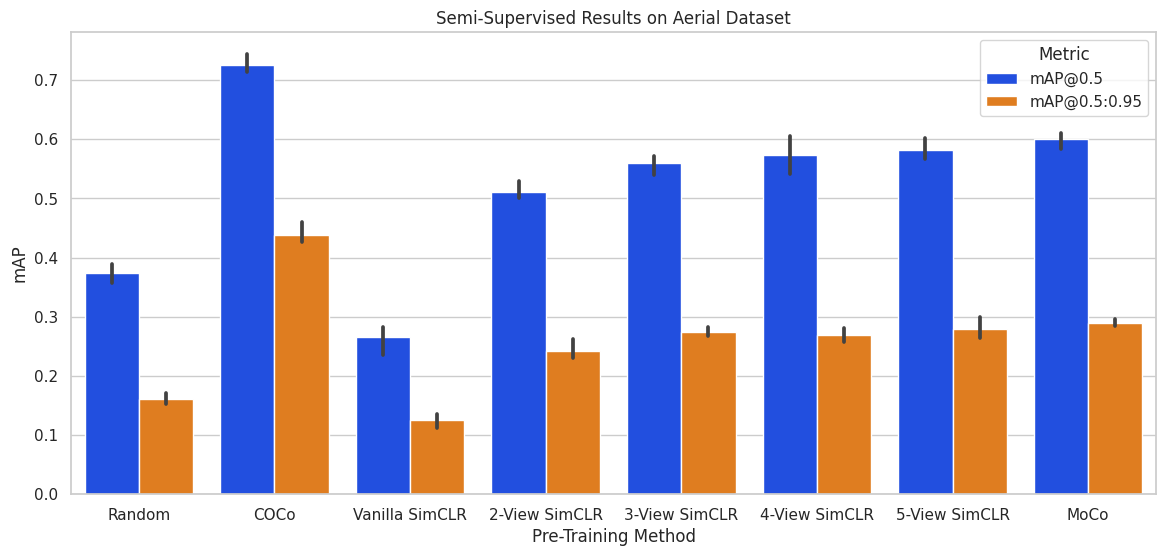

In [14]:
# Set seaborn style
sns.set(style="whitegrid")

# Create the bar plot with 95% confidence interval error bars
plt.figure(figsize=(14, 6))
sns.barplot(data=semi_supervised_results, x='Name', y='mAP', ci=95, palette='bright', order=x_ordered, hue="Metric")
plt.title('Semi-Supervised Results on Aerial Dataset')
plt.xlabel('Pre-Training Method')
plt.ylabel('mAP')
plt.show()

In [15]:
# Generate video plots.
plot_status_scratch = [62.5, 62.5, 68.75]
plot_status_simclr = [81.25] * 3
num_flowers_scratch = [62.5] * 3 + [75]
num_flowers_simclr = [62.5, 75, 68.75, 56.25]
plot_status_moco = [75] * 2 + [81.25]
num_flowers_moco = [81.25] * 2 + [87.5]
plot_status_byol = [75] * 2 + [56.25]
num_flowers_byol = [56.25, 50, 68.75]
plot_status_swav = [81.25, 81.25, 75]
num_flowers_swav = [68.75, 68.75, 56.25]

names = ["Random"] * len(plot_status_scratch) + ["SimCLR"] * len(plot_status_simclr) + ["MoCo"] * len(plot_status_moco) + ["BYOL"] * len(plot_status_byol) + ["SwAV"] * len(plot_status_swav)
plot_status_data = pd.DataFrame(data={"Name": names, "Accuracy": plot_status_scratch + plot_status_simclr + plot_status_moco + plot_status_byol + plot_status_swav})
plot_status_data

,Name,Accuracy
0,Random,62.50
1,Random,62.50
2,Random,68.75
3,SimCLR,81.25
4,SimCLR,81.25
5,SimCLR,81.25
6,MoCo,75.00
7,MoCo,75.00
8,MoCo,81.25
9,BYOL,75.00


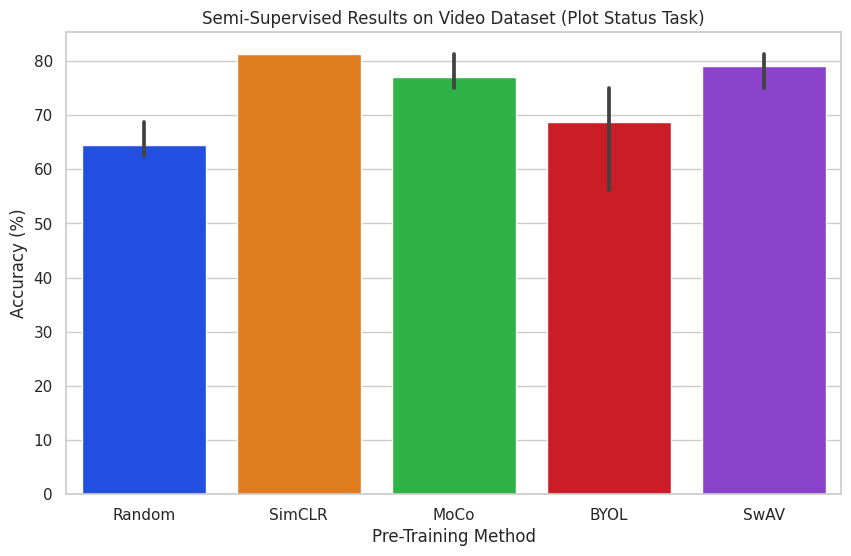

In [16]:
# Set seaborn style
sns.set(style="whitegrid")

x_ordered = ["Random", "SimCLR", "MoCo", "BYOL", "SwAV"]

# Create the bar plot with 95% confidence interval error bars
plt.figure(figsize=(10, 6))
sns.barplot(data=plot_status_data, x='Name', y='Accuracy', ci=95, palette='bright', order=x_ordered)
plt.title('Semi-Supervised Results on Video Dataset (Plot Status Task)')
plt.xlabel('Pre-Training Method')
plt.ylabel('Accuracy (%)')
plt.show()

In [17]:
names = ["Random"] * len(num_flowers_scratch) + ["SimCLR"] * len(num_flowers_simclr) + ["MoCo"] * len(num_flowers_moco) + ["BYOL"] * len(num_flowers_byol) + ["SwAV"] * len(num_flowers_swav)
num_flowers_data = pd.DataFrame(data={"Name": names, "Accuracy": num_flowers_scratch + num_flowers_simclr + num_flowers_moco + num_flowers_byol + num_flowers_swav})
num_flowers_data

,Name,Accuracy
0,Random,62.50
1,Random,62.50
2,Random,62.50
3,Random,75.00
4,SimCLR,62.50
5,SimCLR,75.00
6,SimCLR,68.75
7,SimCLR,56.25
8,MoCo,81.25
9,MoCo,81.25


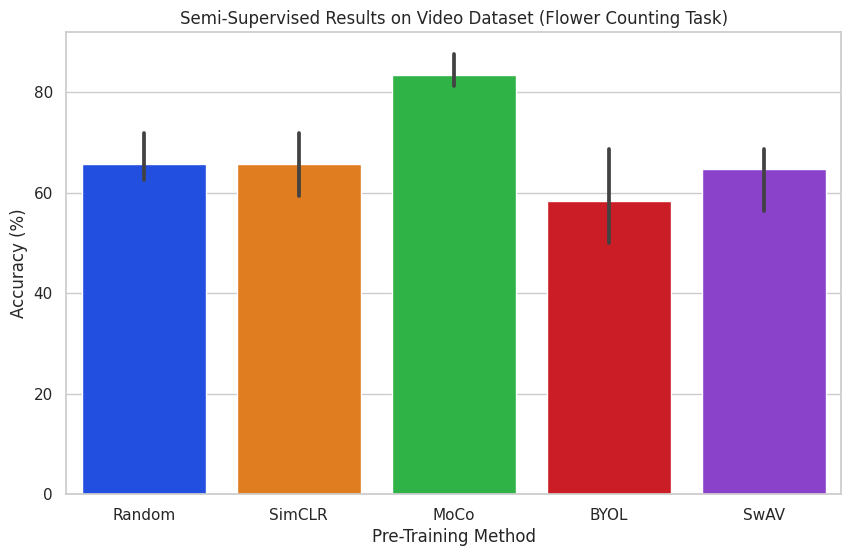

In [18]:
# Set seaborn style
sns.set(style="whitegrid")

# Create the bar plot with 95% confidence interval error bars
plt.figure(figsize=(10, 6))
sns.barplot(data=num_flowers_data, x='Name', y='Accuracy', ci=95, palette='bright', order=x_ordered)
plt.title('Semi-Supervised Results on Video Dataset (Flower Counting Task)')
plt.xlabel('Pre-Training Method')
plt.ylabel('Accuracy (%)')
plt.show()

In [19]:
# Draw a plot for spatial-only training.
num_flowers_moco_spatial = [68.75] * 3
num_flowers_simclr_spatial = [68.75] * 3

names = ["SimCLR"] * (len(num_flowers_simclr) + len(num_flowers_simclr_spatial)) + ["MoCo"] * (len(num_flowers_moco) + len(num_flowers_moco_spatial))
augmentation = ["Spatiotemporal"] * len(num_flowers_simclr) + ["Spatial Only"] * len(num_flowers_simclr_spatial) + ["Spatiotemporal"] * len(num_flowers_moco) + ["Spatial Only"] * len(num_flowers_moco_spatial)
num_flowers_data = pd.DataFrame(data={"Name": names, "Accuracy": num_flowers_simclr + num_flowers_simclr_spatial + num_flowers_moco + num_flowers_moco_spatial, "Augmentation": augmentation})
num_flowers_data

,Name,Accuracy,Augmentation
0,SimCLR,62.50,Spatiotemporal
1,SimCLR,75.00,Spatiotemporal
2,SimCLR,68.75,Spatiotemporal
3,SimCLR,56.25,Spatiotemporal
4,SimCLR,68.75,Spatial Only
5,SimCLR,68.75,Spatial Only
6,SimCLR,68.75,Spatial Only
7,MoCo,81.25,Spatiotemporal
8,MoCo,81.25,Spatiotemporal
9,MoCo,87.50,Spatiotemporal


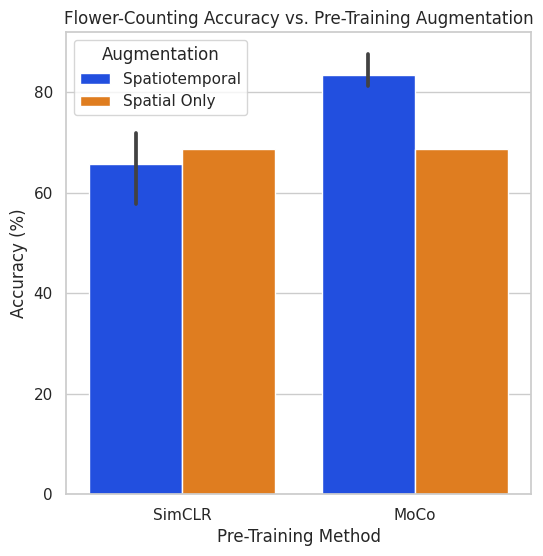

In [20]:
# Set seaborn style
sns.set(style="whitegrid")

# Create the bar plot with 95% confidence interval error bars
plt.figure(figsize=(6, 6))
sns.barplot(data=num_flowers_data, x='Name', y='Accuracy', hue="Augmentation", ci=95, palette='bright', order=["SimCLR", "MoCo"])
plt.title('Flower-Counting Accuracy vs. Pre-Training Augmentation')
plt.xlabel('Pre-Training Method')
plt.ylabel('Accuracy (%)')
plt.show()

In [21]:
# Figure showing performance impacts of pre-training time.
import pandas as pd

training_time_data = pd.read_excel("Training Time Comparison.xlsx")
training_time_data

,Model,Iterations,Accuracy
0,3-View SimCLR,2167,0.60
1,3-View SimCLR,6507,0.70
2,3-View SimCLR,10835,0.85
3,3-View SimCLR,15169,0.95
4,3-View SimCLR,19503,0.85
5,3-View SimCLR,26004,0.80
6,3-View SimCLR,30338,0.90
7,MoCo,16308,0.90
8,MoCo,21744,0.90
9,MoCo,27180,0.85


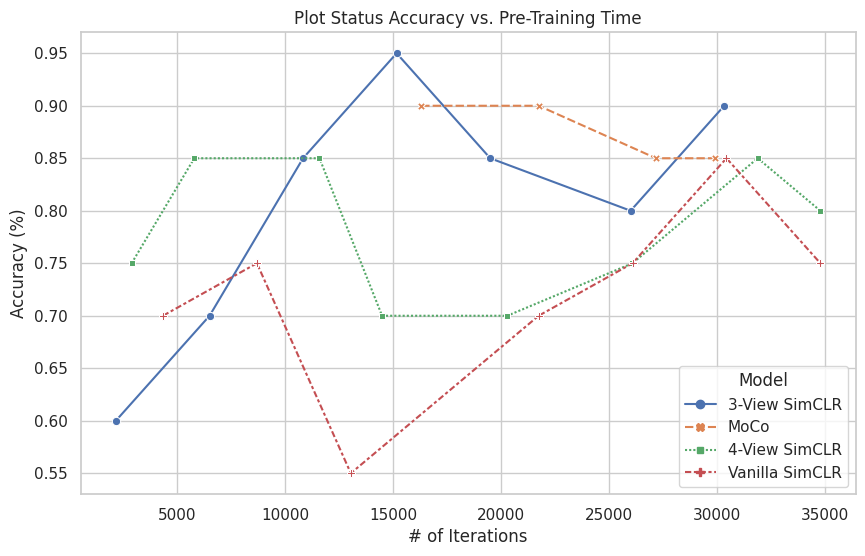

In [22]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set seaborn style
sns.set(style="whitegrid")

# Create the line plot
plt.figure(figsize=(10, 6))
sns.lineplot(data=training_time_data, x='Iterations', y='Accuracy', hue='Model', style='Model', markers=True)
plt.title('Plot Status Accuracy vs. Pre-Training Time')
plt.xlabel('# of Iterations')
plt.ylabel('Accuracy (%)')
plt.legend(title='Model')
plt.show()